In [2]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Significance tests allow us a formal way to state if two or more populations differ from each other.

Instead of eye-balling distributions, or comparing means, we can approach this problem in a more rigorous manner.

It involves four parts

1.) **Define** the Hypothesis

2.) Choose the **significance level**

3.) **Test** the Hypothesis
 - As part of the test, we can define or at least be aware of the **test statistic** used
 - We will get a **p-value**
    
4.) Make a **Decision**


As an example, suppose we have the following data for heights from a sample of 4 adults from Chicago, and 4 adults from Atlanta.

In [3]:
city1_heights = [183.0687026 , 186.70644354, 173.26657415, 179.03252868]


city2_heights = [167.5102584 , 177.81241131, 187.13298753, 175.29871173]

df = pd.DataFrame({'Chicago Heights': city1_heights,
              'Atlanta Heights': city2_heights})

df

,Chicago Heights,Atlanta Heights
0,183.068703,167.510258
1,186.706444,177.812411
2,173.266574,187.132988
3,179.032529,175.298712


In [4]:
df.describe()

,Chicago Heights,Atlanta Heights
count,4.000000,4.000000
mean,180.518562,176.938592
std,5.761733,8.088509
min,173.266574,167.510258
25%,177.591040,173.351598
50%,181.050616,176.555562
75%,183.978138,180.142555
max,186.706444,187.132988


Which city has taller people? Well we can look at the means, but is this difference **significant**?

It looks like Chicago has taller adults on average, but only by about 3cm. Is that enough to be sure? What if we just happened to sample shorter people when measuring Atlanta adults by accident?

In [5]:
df.mean()

Chicago Heights    180.518562
Atlanta Heights    176.938592
dtype: float64

It's hard to note if this difference in heights is due to random chance in our experiment, or if it is truly reflective of the heights of adults in these two cities.

Let's start building a "manual" significance test. We'll do something called **bootstrapping**, this is a trick where we use the data we have to estimate significance.

We'll discuss it for pedagogical purposes to help understand what a p-value is, then we'll move on to the common significance tests that one would use.

**1.) Defining Hypothesis**

The first part of any significance test is to define our **null hypothesis, $H_0$**.

This is typically a statement that there are no differences between two groups of data. We usually want to try to prove the null hypothesis wrong with our test.

The null hypothesis here will be "$H_0$: There is no difference in the means of heights form adults from Chicago and Atlanta"

We can also define an **alternative hypothesis, $H_1$**.

This is usually the research question we wish to prove true, it contrasts to the null hypothesis.

The alternative hypothesis where will be "$H_1$: The means of heights of adults from Chicago is greater than those from Atlanta"

**2.) Set a Significance Level**

We will want to generate something called a p-value and compare it to a significance level $\alpha$. It is common to use $\alpha = 0.05$ or $5\%$

**3.) Run a Hypothesis Test**

We will actually try to use the data to simulate what our experiment could look like if the **null hypothesis** were true. We will do this simulation manually, but in practice you can use an already existing function or test.

We can create a statistic for our testing as we are doing this significance testing manually at the moment, this will be the difference in the means.

In [6]:
observed_mean_diff = df['Chicago Heights'].mean() - df['Atlanta Heights'].mean()
observed_mean_diff

3.579970000000003

We can plot these two samples

(array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1.]),
 array([167.5102584 , 169.47253131, 171.43480423, 173.39707714,
        175.35935005, 177.32162297, 179.28389588, 181.24616879,
        183.2084417 , 185.17071462, 187.13298753]),
 <BarContainer object of 10 artists>)

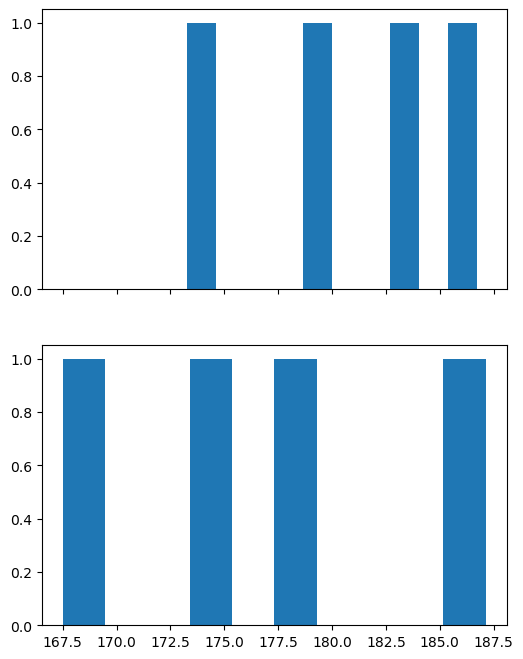

In [7]:
f, ax = plt.subplots(2,1, sharex=True, figsize=(6,8))
ax[0].hist(data=df, x='Chicago Heights')
ax[1].hist(data=df, x='Atlanta Heights')

Because we are manually building a statistical significance test, we will **simulate** the **null hypothesis**

$H_0$ is that there is no difference in heights between Chicago and Atlanta adults. So let's do the following trick.

If $H_0$ were true, then there is no difference between Chicago and Atlanta data, that means we could pool together the data and treat Chicago data and Atlanta data the same.

In [8]:
X1 = df['Chicago Heights']
X2 = df['Atlanta Heights']

In [9]:
data_assuming_null = np.concatenate([X1, X2])
data_assuming_null

array([183.0687026 , 186.70644354, 173.26657415, 179.03252868,
       167.5102584 , 177.81241131, 187.13298753, 175.29871173])

Now we can test if the difference in heights we saw earlier was due to random chance in selecting our adults, or if it may have been caused by a true difference in heights between the two cities.

We will assume $H_0$, and we will pool the data together.

Then, we will re-sample 4 new "Chicagoans" from our pooled-together (null) sample. But these "Chicagoans" may be from either Chicago or Atlanta. Because we are assuming the null hypothesis $H_0$ is true, then there should be no difference in heights between a Chicagoan and an Atlantan.

We'll do the same for Atlanta, and re-sample 4 new "Atlantans" from our pooled-together (null) sample.

We'll then measure the difference in the means between the 4 new "Chicagoans" and 4 new "Atlantans"

In [10]:
def resample_data(X):
    
    simulated_X1 = np.random.choice(data_assuming_null, size=len(df))
    simulated_X2 = np.random.choice(data_assuming_null, size=len(df))
    
    return simulated_X1, simulated_X2

In [11]:
def test_statistic(x1, x2):
    
    return x1.mean() - x2.mean()


In [30]:
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)
print(simulated_chicago_data) # Our re-sampled list of "Chicagoans" 
print()
print(simulated_atlanta_data) # Our re-sampled list of "Atlantans" 

# We mix together Chicago and Atlanta data, and then randomly pull 4 people and label them as
# Chicagoans, and randomly pull 4 other people and label them as Atlantans

[177.81241131 173.26657415 175.29871173 183.0687026 ]

[177.81241131 173.26657415 177.81241131 173.26657415]


In [31]:
simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)
simulated_mean_difference

# Find the difference in means of the two new groups

1.8221072174999904

Compare this to our observed difference of means

In [21]:
observed_mean_diff

3.579970000000003

This allows us to re-perform our experiment, but under the assumption that there shouldn't be a difference between Chicagoans and Atlatans in their heights.

This let's us focus on the following question: "Assuming there is no difference in height between the cities, how would random chance in selecting four participants impact our measurements."

In [32]:
list_sim_mean_diff = []

n = 0

-5.937915270000019


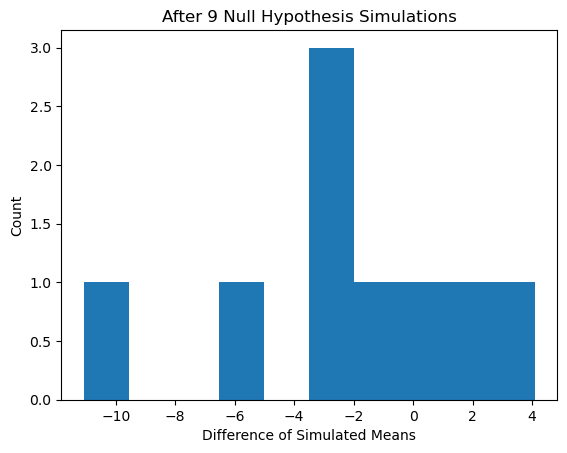

In [41]:
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

list_sim_mean_diff.append(simulated_mean_difference)

print(simulated_mean_difference)


n += 1

plt.hist(list_sim_mean_diff)
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

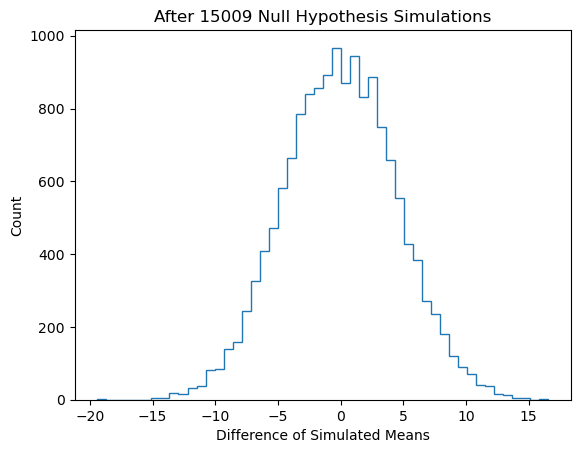

In [44]:
for _ in range(5000):
    
    simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

    simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

    list_sim_mean_diff.append(simulated_mean_difference)
    
    n += 1
    
plt.hist(list_sim_mean_diff, bins=50, histtype='step')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

In [45]:
list_sim_mean_diff = np.array(list_sim_mean_diff)

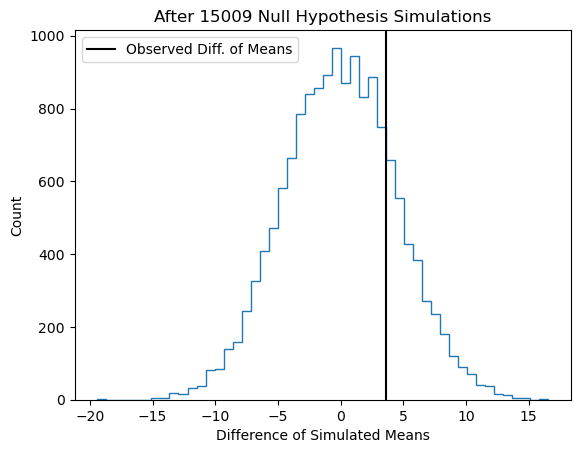

In [48]:
plt.hist(list_sim_mean_diff, bins=50, histtype='step')

plt.axvline(observed_mean_diff, c='k', label='Observed Diff. of Means')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.legend()
plt.show()

In [51]:
sim_mean_diff_less_obs = sum(list_sim_mean_diff > observed_mean_diff)

p_value = sim_mean_diff_less_obs/len(list_sim_mean_diff)

print(f"In our dataset, we observed a difference of the means of {observed_mean_diff:.4f}")
print()

print(f'Out of all {len(list_sim_mean_diff)} simulated null samples, {sim_mean_diff_less_obs} have mean differences greater than the true observed mean difference')
print()
print(f"That's a fraction of {p_value:4f} or {p_value*100:.3f}%")
print()
print(f"This is also our simulated p-value, {p_value:4f}")


In our dataset, we observed a difference of the means of 3.5800

Out of all 15009 simulated null samples, 3140 have mean differences greater than the true observed mean difference

That's a fraction of 0.209208 or 20.921%

This is also our simulated p-value, 0.209208


The **p-value** tell us, assuming our **null hypothesis** that both samples are actually the same *were true*, what the probability would be of getting the metric (difference in means) that we *observed*.

**4.) Make a Decision**

If the p-value is low, then that means the null hypothesis should rarely give us our observed metric.

So we can reject the null hypothesis.

If the p-value is high, then that means the null hypothesis could often give us our observed metric.

So we can't reject the null hypothesis, though it doesn't mean it is true - we just can't reject it.

We compare this p-value to a given significance level $\alpha$, usually 0.05 (5%)

If p-value $< \alpha$ we reject $H_0$

If p-value $\geq \alpha$ we can't reject $H_0$



Given a 0.05 significance level, do we reject our null hypothesis, or state there is evidence for the null hypothesis beign true?

In [ ]:
p_value

This is a bootstrap approaching to estimating the p-value.

It is non-parametric, meaning it doesn't assume any distribution for the data.

It is data-driven because we use the data to generate simulated samples.

To recap:
    
1.) We define a **null hypothesis $H_0$**: No difference in Chicago and Atlanta mean heights

and an alternative hypothesis we intend to prove is true $H_1$: There is a difference in Chicago and Atlanta mean heights.
    
2.) We choose a **level of significance $\alpha$**, usually 0.05

3.) We run a **test** to get a test-statistics and a p-value.

   - In this case, we did a manual bootstrapping test to simulate the null hypothesis 
   - The **test statistic** that we simulated was the *difference of means*
   - And we used this to find a **p-value**
       
4.) We make a **decision**. 

   - The p-value is greater than $\alpha$, so we can't reject the null hypothesis.
    
   - We saw that if we assume the null hypohesis, the difference in Chicago and Atlanta mean heights may be as large as our observed difference 22% of the time!

# Common Significance Tests

In practice, a signficance test is easier to implement than this.

You don't have to do a non-parametric bootstrap, and in practice the above can have its limits.

We can use parametric significance tests which assume a distribution of the **test-statistic** and find a p-value from this.

Depending on what you are testing, you can use different significance tests

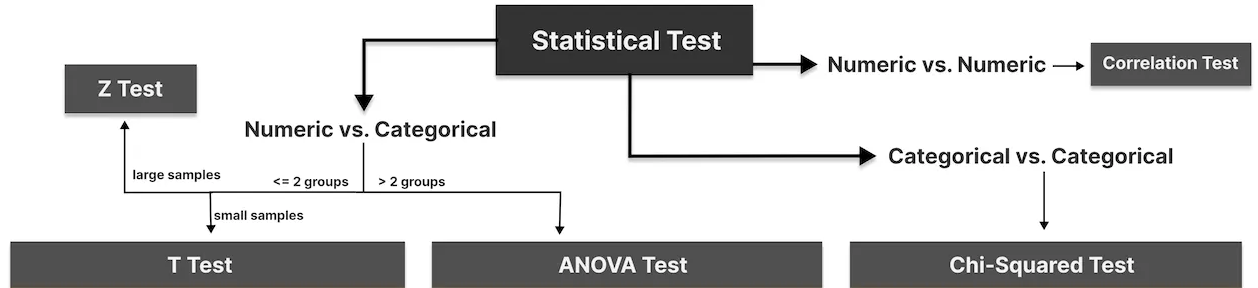

## t-Test

For example, assume that we instead ran a **t-test** on the above data.

A **t-test** is used to compare the means of data.

- It can be used when the samples you have are small ($n \leq 30$)

- It can be used when you don't know the population variance.

     - e.g. here we don't know the population variance, i.e. the variance of all Chicago or Atlanta heights.

There are two types of t-tests

A **one-sample t-test** can be used to compare the mean of a sample of data to some population mean.

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

A **two independent sample t-test** can be used to compare the means of two samples of data. (This is what we could ran because we have two samples, Chicago and Atlanta)

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

A t-test will give us a *t-test statistic* and a *p-value*

For an **independent two-sample t-test**, the test statistic is

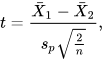

where

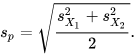.

This is calculated using the two samples you have: $\bar{X}_1$ and $\bar{X}_2$.

You don't have to calculate this statistic, programming packages will do it for you. See above docs.

Assume you ran the **independent two-sample t-test** on the above Chicago and Atlanta heights

1.) First, assume a null hypothesis. 

$H_0$: There is no difference between the means of the Chicago and Atlanta heights, 

and an alternative hypothesis 

$H_1$: There is a difference in means.

2.) Choose a significance level. Use $\alpha=0.05$

3.) Run a t-test. Do this with an already built function

If we ran `scipy.stats.ttest_ind`, you would get the following:

In [52]:
t_statistic = 0.72098

In [53]:
p_value = 0.4980

4.) From this p-value, you can make a decision by comparing it to the significance level.

**What is going on under the hood?**

To make sense of this, the program would calculate the **t-test statistic** for the given two samples of data using the equation above.

Then it would compare this calculated test statistic to the distribution of t-test statistics that a null hypothesis would generate. 

The distribution of t-test statistics that a null hypothesis would generate is given by a **Student's t-distribution**

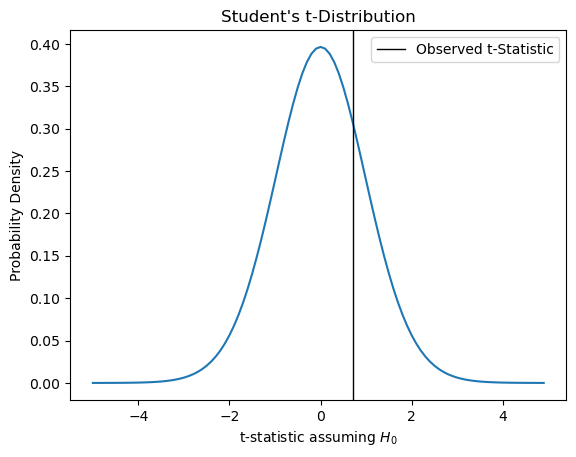

In [54]:
tdist = scipy.stats.t(df=40-2)

x_values = np.arange(-5,5,0.1)
tdist_pdf = tdist.pdf(x_values)

plt.plot(x_values, tdist_pdf)

plt.axvline(t_statistic, c='k', label='Observed t-Statistic', lw=1)
#plt.axvline(-t_statistic, c='k', lw=1) # For two-sided

plt.title("Student's t-Distribution")
plt.xlabel('t-statistic assuming $H_0$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

(-0.01, 1.01)

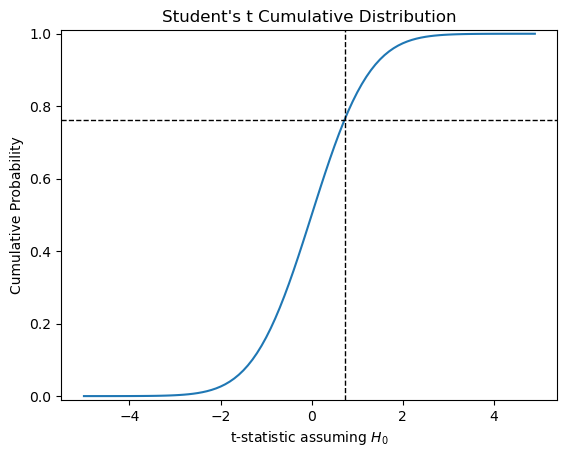

In [55]:
tdist_cdf = tdist.cdf(x_values)
plt.plot(x_values, tdist_cdf)

plt.axvline(t_statistic, c='k', lw=1, ls='--')
plt.axhline(0.76233, c='k', lw=1, ls='--')

plt.title("Student's t Cumulative Distribution")
plt.xlabel('t-statistic assuming $H_0$')
plt.ylabel('Cumulative Probability')

plt.ylim(-.01, 1.01)

In [56]:
(1 - tdist.cdf(t_statistic))# * 2

0.2376671616138598

Many of these significance tests involve this type of logic: calculating a test-statistic and using it to find a p-value.
    

You really only need to worry about 

1.) defining the null hypothesis, 

2.) learning how to run the test using the appropriate function, and 

3.) how to interpret the p-values

## ANOVA

**Analysis of Variance (ANOVA)** is a statistical method used to compare means between *three or more* groups. It tests the null hypothesis that the means of the groups are equal against the alternative hypothesis that at least one of the group means is different.

It does this by decomposing the total variability of the data into two componenets: 

- Between-group variability - A measure of differences between group means.

- Within-group variability - A measure of dipsersion of the data within each group.

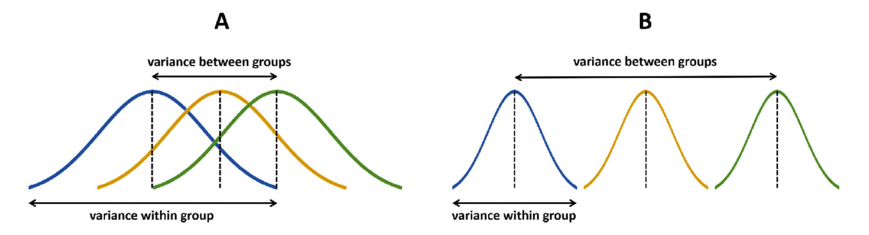

Each test makes use of a null and alternative hypothesis. For ANOVA these are:

$H_0$: The means of the groups are equal

$H_1$: At least one of the group means is different



You can use `scipy.stats.f_oneway` to calculate ANOVA for any given number of samples

See docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


In [57]:
group0 = [24.5, 23.5, 26.4, 27.1, 29.9]
group1 = [28.4, 34.2, 29.5, 32.2, 30.1]
group2 = [26.1, 28.3, 24.3, 26.2, 27.8]

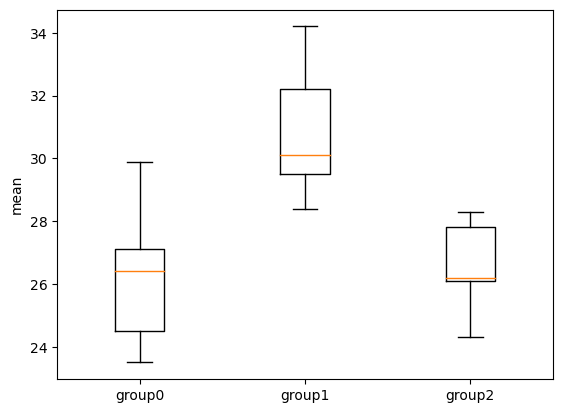

In [58]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([group0, group1, group2])
ax.set_xticklabels(["group0", "group1", "group2"]) 
ax.set_ylabel("mean") 
plt.show()

Use ANOVA for these groups to see if there is a significant difference. **This will be part of today's project.** Check docs for reference!

After using ANOVA, it is useful to inspect data further if we notice there *are* significant difference in the means.

Note that ANOVA just tests if there is a difference in the means of the various groups. It doesn't check how each group differs from the others.

**Tukey's HSD** test is good for doing pairwise comparisons of means for sets of samples. This compares the mean of each sample/group to the mean of the other samples/groups.

This can tell us which groups are significantly different or no.

In [59]:
test = scipy.stats.tukey_hsd(group0, group1, group2)
print(test)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -4.600     0.014    -8.249    -0.951
 (0 - 2)     -0.260     0.980    -3.909     3.389
 (1 - 0)      4.600     0.014     0.951     8.249
 (1 - 2)      4.340     0.020     0.691     7.989
 (2 - 0)      0.260     0.980    -3.389     3.909
 (2 - 1)     -4.340     0.020    -7.989    -0.691



## Chi-Squared Test

The **chi-squared test** is a statistical test used to determine whether there is a significant association between two categorical variables. It is commonly used to analyze contingency tables, where the rows represent one categorical variable and the columns represent another categorical variable

For example, is there evidence that aspirin reduces the risk of stroke?

In [60]:
data = {'Aspirin': [176, 21035],
        'Control/Placebo': [230, 21018]}
index = ['Ischemic stroke', 'No stroke']
contingency_table = pd.DataFrame(data, index=index)

contingency_table

,Aspirin,Control/Placebo
Ischemic stroke,176,230
No stroke,21035,21018


<Axes: >

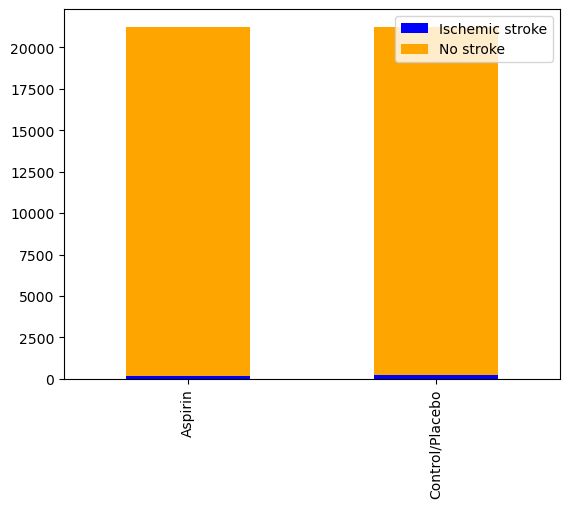

In [61]:
(contingency_table.T).plot(kind='bar', stacked=True, color=['blue', 'orange'])

1.) Define null hypothesis

$H_0$: The effect of aspirin is equivalent to the control
    
$H_1$: Aspirin has an impact on the number of strokes

    

2.) Define $\alpha = 0.05$

3.) Run test using `scipy.stats.chi2_contingency`

In [62]:
results = scipy.stats.chi2_contingency(contingency_table)
print(results)

Chi2ContingencyResult(statistic=6.892569132546561, pvalue=0.008655478161175739, dof=1, expected_freq=array([[  202.82309993,   203.17690007],
       [21008.17690007, 21044.82309993]]))


In [63]:
print(results.pvalue)

0.008655478161175739


The p-value is less than the significance level of 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis that aspirin does have an impact on strokes at a 5% significance level.

A correlation test is a statistical method used to assess the strength and direction of the relationship between two continuous variables. It quantifies the degree to which changes in one variable are associated with changes in another variable.

Note here we aren't checking the difference of means, or difference of samples. We are checking if two samples have a relationship - if they appear to change together.

The most common is the **Pearson Correlation Coefficient**. This measures the linear relationship between two continuous variables. The test gives us a correlation coefficient, $r$ which ranges from -1 to 1, where:

- $r=1$: Perfect positive correlation

- $r=−1$: Perfect negative correlation

- $r=0$: No correlation

and it can also give us a p-value which tells us if the correlation is significant or not.

The null hypothesis for the Pearson Correlation test is

$H_0$: The distributions underlying the samples are uncorrelated and normally distributed

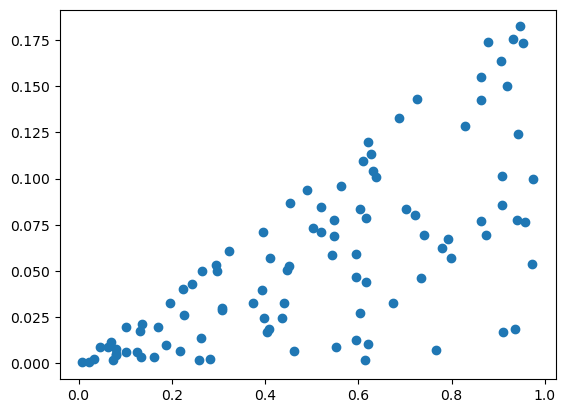

In [64]:
# Example data
x = np.random.rand(100)
y = 2*x*np.random.uniform(0, 0.1, 100)
plt.scatter(x,y)

In [65]:
results = scipy.stats.pearsonr(x, y)

print(f"r      = {results.statistic:6f}")
print(f"pvalue = {results.pvalue:6f}")

r      = 0.709288
pvalue = 0.000000
